In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Breast_cancer_data[1].csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
#adding a new column for the line intercept and initializing with ones
#inserting a new column as first column
# df.insert(loc=0,column='theta0',value=1)
# df
df = np.array(df)
np.random.shuffle(df)
df

array([[1.396e+01, 1.705e+01, 9.143e+01, 6.024e+02, 1.096e-01, 0.000e+00],
       [1.134e+01, 2.126e+01, 7.248e+01, 3.965e+02, 8.759e-02, 1.000e+00],
       [1.247e+01, 1.731e+01, 8.045e+01, 4.801e+02, 8.928e-02, 1.000e+00],
       ...,
       [1.263e+01, 2.076e+01, 8.215e+01, 4.804e+02, 9.933e-02, 1.000e+00],
       [1.426e+01, 1.817e+01, 9.122e+01, 6.331e+02, 6.576e-02, 1.000e+00],
       [1.032e+01, 1.635e+01, 6.531e+01, 3.249e+02, 9.434e-02, 1.000e+00]])

In [4]:
#splitting the dataset into training and testing set
r = df.shape[0]
c = df.shape[1]
#df = np.array(df)
idx = 8*r//10
x_train = df[:idx,:c-1]
y_train = df[:idx,-1]
x_test  = df[idx:,:c-1]
y_test  = df[idx:,-1]
print("x training data:")
print(x_train,end="\n\n")
print("y training data:")
print(y_train,end="\n\n")
print("x testing data:")
print(x_test,end="\n\n")
print("y testing data:")
print(y_test)

x training data:
[[1.396e+01 1.705e+01 9.143e+01 6.024e+02 1.096e-01]
 [1.134e+01 2.126e+01 7.248e+01 3.965e+02 8.759e-02]
 [1.247e+01 1.731e+01 8.045e+01 4.801e+02 8.928e-02]
 ...
 [1.714e+01 1.640e+01 1.160e+02 9.127e+02 1.186e-01]
 [1.955e+01 2.877e+01 1.336e+02 1.207e+03 9.260e-02]
 [1.953e+01 1.890e+01 1.295e+02 1.217e+03 1.150e-01]]

y training data:
[0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.

In [5]:
#normalizing the data
for c in range(x_train.shape[1]):
    if c!='theta0':
        min_train = np.min(x_train[:,c])
        max_train = np.max(x_train[:,c])
        min_test = np.min(x_test[:,c])
        max_test = np.max(x_test[:,c])
        x_train[:,c]=(x_train[:,c]-min_train)/(max_train-min_train)
        x_test[:,c]=(x_test[:,c]-min_test)/(max_test-min_test)
print(x_train,end="\n\n")
print(x_test)

[[0.30572592 0.24822455 0.30950349 0.18241323 0.51430893]
 [0.17717482 0.39059858 0.17470479 0.09374731 0.31560892]
 [0.23261862 0.25701725 0.23139849 0.12974765 0.33086576]
 ...
 [0.46175359 0.22624281 0.48427941 0.31603652 0.59555836]
 [0.58000098 0.6445722  0.60947503 0.44276979 0.36083777]
 [0.57901968 0.31078796 0.58031014 0.44707605 0.56305859]]

[[0.54217758 0.37990328 0.54516452 0.41762201 0.46265131]
 [0.40168834 0.1015583  0.38191596 0.27690796 0.11809861]
 [0.23223859 0.22299839 0.22304257 0.13874877 0.17965751]
 [0.35855567 0.35679742 0.35785252 0.23897805 0.21671095]
 [0.90141105 0.61579796 0.91705405 0.82771045 0.75199291]
 [0.26797708 0.1794734  0.2552183  0.16580413 0.41378801]
 [0.19650009 0.21816228 0.18922614 0.11031772 0.70327724]
 [0.17838437 0.46104245 0.18375718 0.10140845 0.51284322]
 [0.38751617 0.33315422 0.37152493 0.26393711 0.27590788]
 [0.51383326 0.34658786 0.54151855 0.37327219 1.        ]
 [0.14886931 0.58355723 0.14547443 0.0820832  0.20563921]
 [0.489

In [6]:
#converting the training and testing datasets into numpy arrays
# x_train = np.array(x_train)
# x_test = np.array(x_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [7]:
# Using hinge loss function
# def hypothesis(x,w):
#     return np.dot(x,w)


def grad_descent(x,y,reg,alpha,epoch):
    r=x.shape[0]
    c=x.shape[1]
    w = np.ones((c,1))
    b=0
    min_w=[]
    min_b=None
    min_cost=None
    cost_list=[]
    for itr in range(epoch):
        cost = reg*np.dot(w.T,w)
        for i in range(r):
            if y[i]*np.dot(x[i],w)<1:
                for j in range(c):
                    w[j]-=alpha*(2*reg*w[j]-y[i]*x[i,j])
                b-=alpha*y[i]*-1
            else:
                for j in range(c):
                    w[j]-=alpha*(2*reg*w[j])
                cost+= 1-y[i]*np.dot(x[i],w)  
        #print(cost)
        cost_list.append(cost[0])
        if min_cost is None or min_cost>cost:
            min_cost=cost
            min_w=w
            min_b=b
            
    return min_w,min_b,np.array(cost_list)

def plotCost(cost):
    plt.plot(cost)
    plt.xlabel('no. of iterations')
    plt.ylabel('cost')
    
def calAccuracy(pred,y_):
    correct=0
    for i in range(len(pred)):
        if pred[i]==y_[i]:
            correct+=1
    return correct*100/len(pred)

def predict(x_,y_,w,b):
    py = np.dot(x_,w)+b
    py=list(py)
    for i in range(len(py)):
        if py[i]>=1:
            py[i]=1
        else:
            py[i]=0
    return py

def showPredictions(pred,y_):
    for i in range(len(pred)):
        print("predicted: ",pred[i],end='  ')
        print("actual: ",y_[i])

[[0.80531082]
 [1.11095043]
 [0.80048453]
 [0.43375577]
 [1.65339922]] 2.621599999999842
(1000, 1)


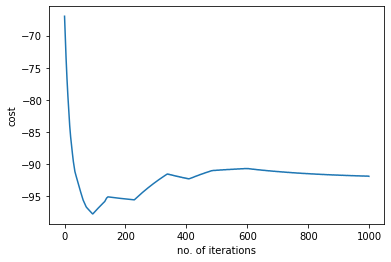

In [8]:
alpha = 0.0008
epoch = 1000
reg = 0.005 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)

In [9]:
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

accuracy of model: 67.54385964912281%


In [10]:
showPredictions(pred_y,y_test)

predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actua

[[0.92731759]
 [1.14274647]
 [0.92820393]
 [0.78463255]
 [1.39563051]] 2.612700000001089
(1000, 1)


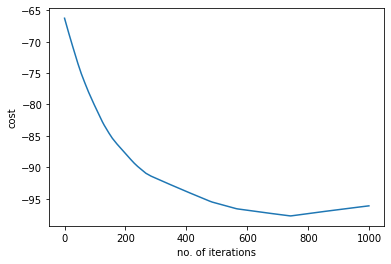

In [11]:
alpha = 0.0001
epoch = 1000
reg = 0.005 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)

In [12]:
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

accuracy of model: 67.54385964912281%


[[0.66045016]
 [0.85352731]
 [0.65132229]
 [0.36795507]
 [1.11475633]] 0.005600000000000002
(1000, 1)
accuracy of model: 50.87719298245614%


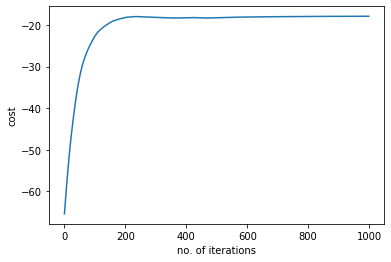

In [13]:
alpha = 0.0001
epoch = 1000
reg = 0.05 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [14]:
showPredictions(pred_y,y_test)

predicted:  1  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  0  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  0  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  0  actual:  1.0
predicted:  1  actual:  0.0
predicted:  0  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  0.0
predicted:  0  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actual:  1.0
predicted:  1  actual:  1.0
predicted:  1  actual:  0.0
predicted:  1  actua

[[0.65962274]
 [0.85616122]
 [0.65042194]
 [0.36239769]
 [1.13382358]] 1.0900000000000007
(1000, 1)
accuracy of model: 67.54385964912281%


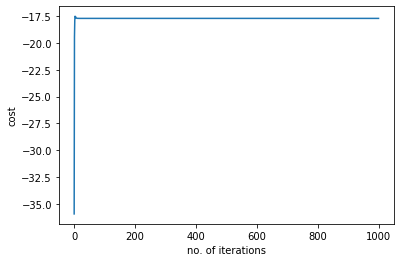

In [15]:
alpha = 0.01
epoch = 1000
reg = 0.05 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

[[0.13566798]
 [0.17142123]
 [0.13424118]
 [0.07674906]
 [0.22311089]] 0.006200000000000003
(1000, 1)
accuracy of model: 32.45614035087719%


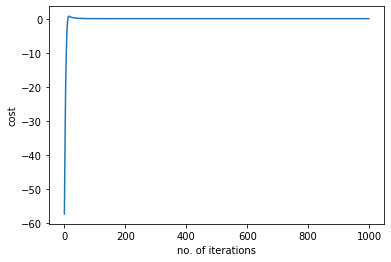

In [16]:
alpha = 0.0001
epoch = 1000
reg = 0.5 # regularization parameter
theta,b,cost_list=grad_descent(x_train,y_train,reg,alpha,epoch)
print(theta,b)
print(cost_list.shape)
plotCost(cost_list)
pred_y = predict(x_test,y_test,theta,b)
accuracy = calAccuracy(pred_y,y_test)
print(f"accuracy of model: {accuracy}%")

In [17]:
showPredictions(pred_y,y_test)

predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actual:  1.0
predicted:  0  actual:  1.0
predicted:  0  actual:  0.0
predicted:  0  actua